In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("HRDataset_v14.csv")

In [4]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [5]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [6]:
df.shape

(311, 36)

In [7]:
df.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [8]:
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [9]:
df.fillna("0", inplace = True)

In [10]:
df.duplicated().sum()

0

In [11]:
# Employee with highest salaries
df["Salary"].sort_values(ascending = False).head(10)

150    250000
308    220450
131    180000
96     178000
55     170500
190    157000
240    150290
244    148999
243    140920
76     138888
Name: Salary, dtype: int64

In [12]:
df.PerformanceScore

0          Exceeds
1      Fully Meets
2      Fully Meets
3      Fully Meets
4      Fully Meets
          ...     
306    Fully Meets
307            PIP
308        Exceeds
309    Fully Meets
310    Fully Meets
Name: PerformanceScore, Length: 311, dtype: object

In [13]:
df.PerformanceScore.unique()

array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

In [14]:
# Employees who are on PIP
df[df.PerformanceScore == "PIP"]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
67,"Delarge, Alex",10306,0,0,1,1,6,1,0,61568,...,John Smith,17.0,Indeed,PIP,1.93,3,0,1/30/2019,6,5
69,"Desimone, Carl",10310,1,1,1,1,5,1,0,53189,...,Amy Dunn,11.0,Indeed,PIP,1.12,2,0,1/31/2019,4,9
72,"Dietrich, Jenna",10304,0,0,0,1,6,1,0,59231,...,John Smith,17.0,Website,PIP,2.30,1,0,1/29/2019,2,17
83,"Erilus, Angela",10299,0,3,0,1,5,1,0,56847,...,Michael Albert,22.0,Indeed,PIP,3.00,1,0,2/25/2019,2,5
90,"Fernandes, Nilson",10308,1,1,1,1,5,1,0,64057,...,Amy Dunn,11.0,Indeed,PIP,1.56,5,0,1/3/2019,6,15
91,"Fett, Boba",10309,0,0,1,1,3,1,0,53366,...,Peter Monroe,7.0,LinkedIn,PIP,1.20,3,6,2/4/2019,3,2
95,"Forrest, Alex",10305,1,1,1,1,6,3,0,70187,...,Lynn Daneault,21.0,Employee Referral,PIP,2.00,5,0,1/28/2019,4,7
112,"Gonzalez, Juan",10300,1,1,1,5,5,1,1,68898,...,Brannon Miller,12.0,Diversity Job Fair,PIP,3.00,3,0,3/6/2011,3,10
188,"Miller, Ned",10298,0,0,1,5,5,1,0,55800,...,Brannon Miller,12.0,LinkedIn,PIP,3.00,2,0,1/14/2013,6,6
205,"O'hare, Lynn",10303,0,0,0,4,5,1,0,52674,...,Kissy Sullivan,20.0,LinkedIn,PIP,2.33,2,0,3/9/2018,6,3


In [15]:
len(df[df.PerformanceScore == "PIP"])

13

In [16]:
# Employees with highest leaves
df.Absences.value_counts()

Absences
4     23
16    23
7     21
2     21
15    20
13    17
14    17
3     16
19    16
6     16
11    15
17    15
1     14
20    14
9     14
5     12
8     11
10    10
12     8
18     8
Name: count, dtype: int64

In [17]:
df.Absences.value_counts(normalize=True) * 100

Absences
4     7.395498
16    7.395498
7     6.752412
2     6.752412
15    6.430868
13    5.466238
14    5.466238
3     5.144695
19    5.144695
6     5.144695
11    4.823151
17    4.823151
1     4.501608
20    4.501608
9     4.501608
5     3.858521
8     3.536977
10    3.215434
12    2.572347
18    2.572347
Name: proportion, dtype: float64

In [18]:
# Martialstatus of Employees
df[df.MaritalStatusID == True]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
10,"Baczenski, Rachael",10252,1,1,0,5,5,3,1,54670,...,David Stanley,14.0,Diversity Job Fair,Fully Meets,4.20,4,0,1/30/2016,0,12
11,"Barbara, Thomas",10242,1,1,1,5,5,3,1,47211,...,Kissy Sullivan,20.0,Diversity Job Fair,Fully Meets,4.20,3,0,5/6/2016,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,"Valentin,Jackie",10205,1,1,0,1,6,3,0,57859,...,John Smith,17.0,Indeed,Fully Meets,2.81,3,0,1/17/2019,0,16
292,"Voldemort, Lord",10118,1,1,1,4,3,3,0,113999,...,Simon Roup,4.0,Employee Referral,Fully Meets,4.33,3,7,2/15/2017,0,9
293,"Volk, Colleen",10022,1,1,0,4,5,4,0,49773,...,Kelley Spirea,18.0,Google Search,Exceeds,4.30,5,0,2/1/2015,0,18
296,"Wallace, Courtney E",10274,1,1,0,5,5,3,1,80512,...,Janet King,2.0,Diversity Job Fair,Fully Meets,4.50,3,0,1/2/2012,0,5


In [19]:
df["SpecialProjectsCount"].sort_values(ascending = False)

61     8
299    8
243    7
254    7
25     7
      ..
126    0
127    0
128    0
129    0
310    0
Name: SpecialProjectsCount, Length: 311, dtype: int64

In [20]:
df['Salary'].sort_values(ascending = False).head(10)

150    250000
308    220450
131    180000
96     178000
55     170500
190    157000
240    150290
244    148999
243    140920
76     138888
Name: Salary, dtype: int64

In [21]:
df['Salary'].sort_values(ascending = False).tail(10)

226    46430
247    46428
74     46335
159    46120
216    45998
152    45433
176    45395
231    45115
140    45069
310    45046
Name: Salary, dtype: int64

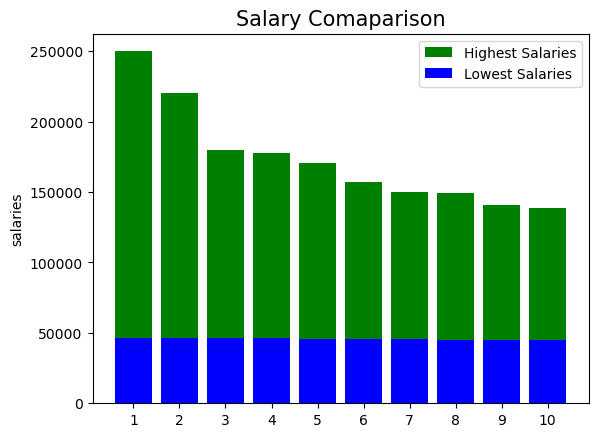

In [22]:
# Salary Comparison

c = [1,2,3,4,5,6,7,8,9,10]
y1 = df['Salary'].sort_values(ascending = False).head(10)
y2 = df['Salary'].sort_values(ascending = False).tail(10)

plt.bar(c, y1, color = 'g', label = 'Highest Salaries')
plt.bar(c, y2, color = 'b', label = 'Lowest Salaries')

plt.title("Salary Comaparison", fontsize = 15)

plt.xticks(c)
plt.ylabel('salaries')
plt.legend()
plt.show()

In [23]:
# Most Common Source of Recruitment
l = df.RecruitmentSource.value_counts()

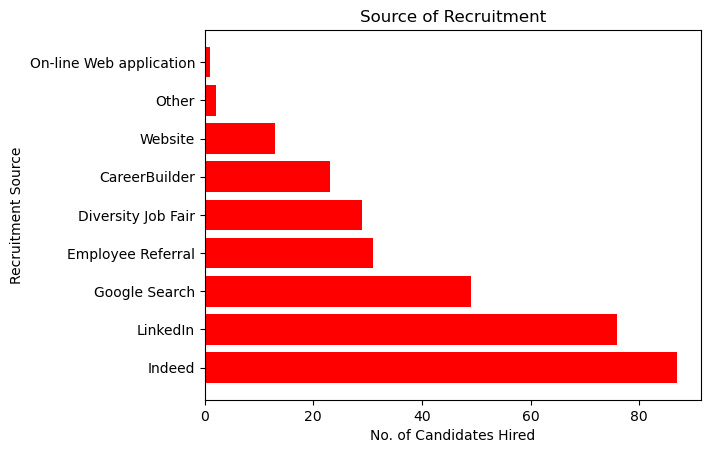

In [24]:
plt.barh(l.index, l, color = 'r')
plt.title("Source of Recruitment", fontsize = 12)
plt.xlabel("No. of Candidates Hired")
plt.ylabel("Recruitment Source")
plt.show()

In [25]:
z = df["PerformanceScore"].value_counts()

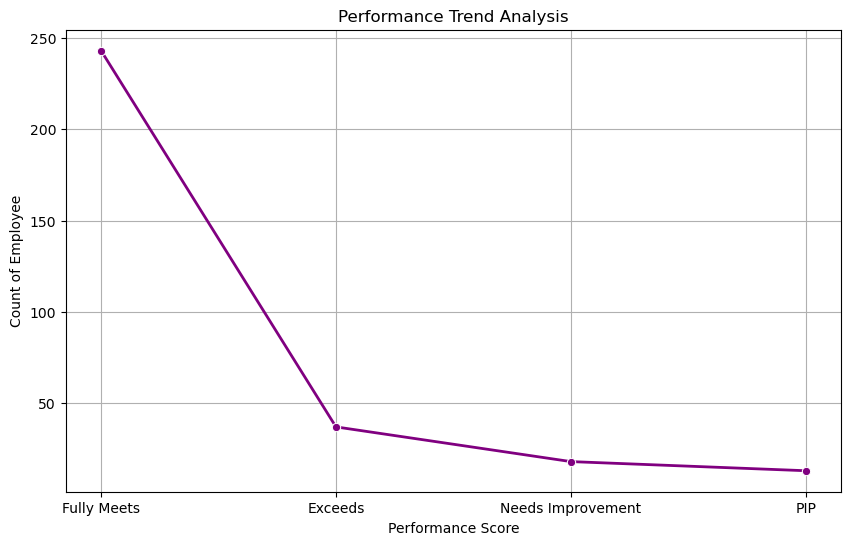

In [26]:
plt.figure(figsize = (10,6))
sns.lineplot(data = z, marker = 'o', color = "purple", linewidth = 2)

plt.title("Performance Trend Analysis")
plt.xlabel("Performance Score")
plt.ylabel("Count of Employee")
plt.grid()

In [27]:
b = df.EmpSatisfaction.value_counts()

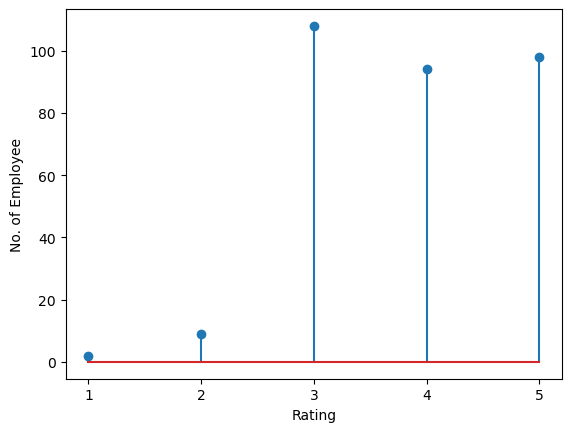

In [28]:
plt.stem(b.index, b)
plt.ylabel("No. of Employee")
plt.xlabel("Rating")
plt.xticks(b.index)
plt.show()

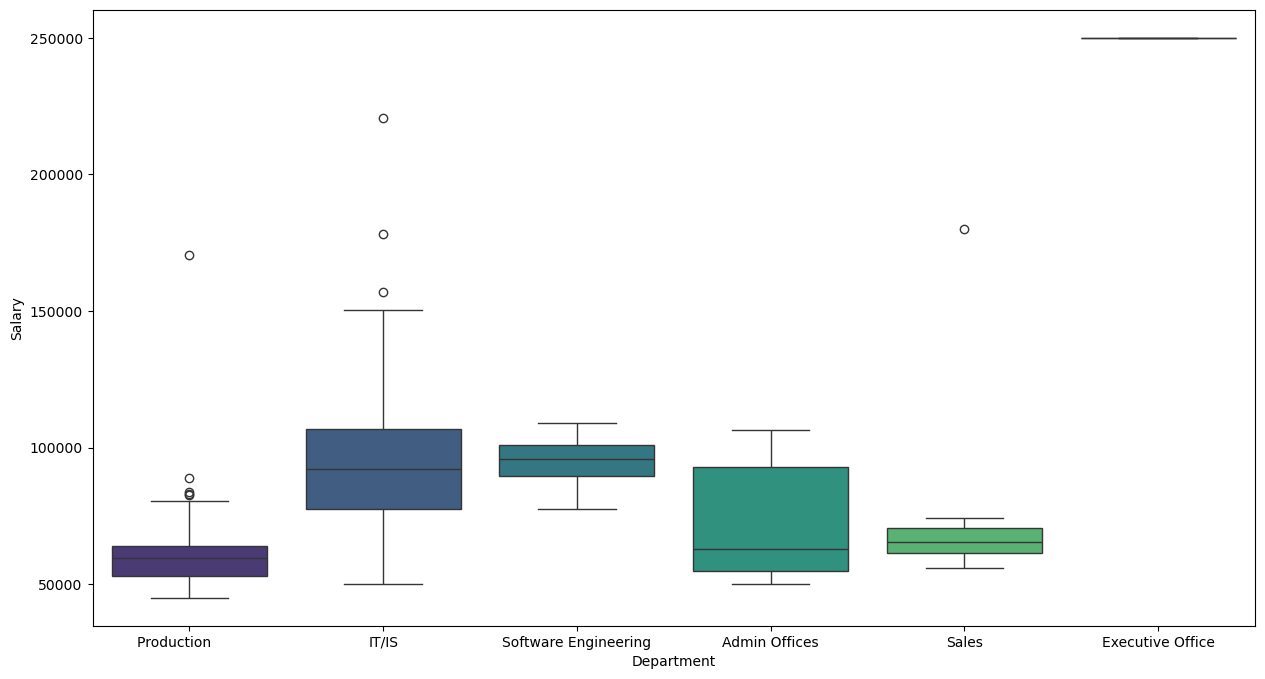

In [29]:
plt.figure(figsize = (15,8))

sns.boxplot(x = 'Department', y = 'Salary', data = df, palette = 'viridis')
plt.xlabel("Department")
plt.ylabel("Salary")
plt.show()

In [30]:
df.EngagementSurvey

0      4.60
1      4.96
2      3.02
3      4.84
4      5.00
       ... 
306    4.07
307    3.20
308    4.60
309    5.00
310    4.50
Name: EngagementSurvey, Length: 311, dtype: float64

In [31]:
df.Position

0       Production Technician I
1                       Sr. DBA
2      Production Technician II
3       Production Technician I
4       Production Technician I
                 ...           
306    Production Technician II
307     Production Technician I
308                         CIO
309                Data Analyst
310     Production Technician I
Name: Position, Length: 311, dtype: object

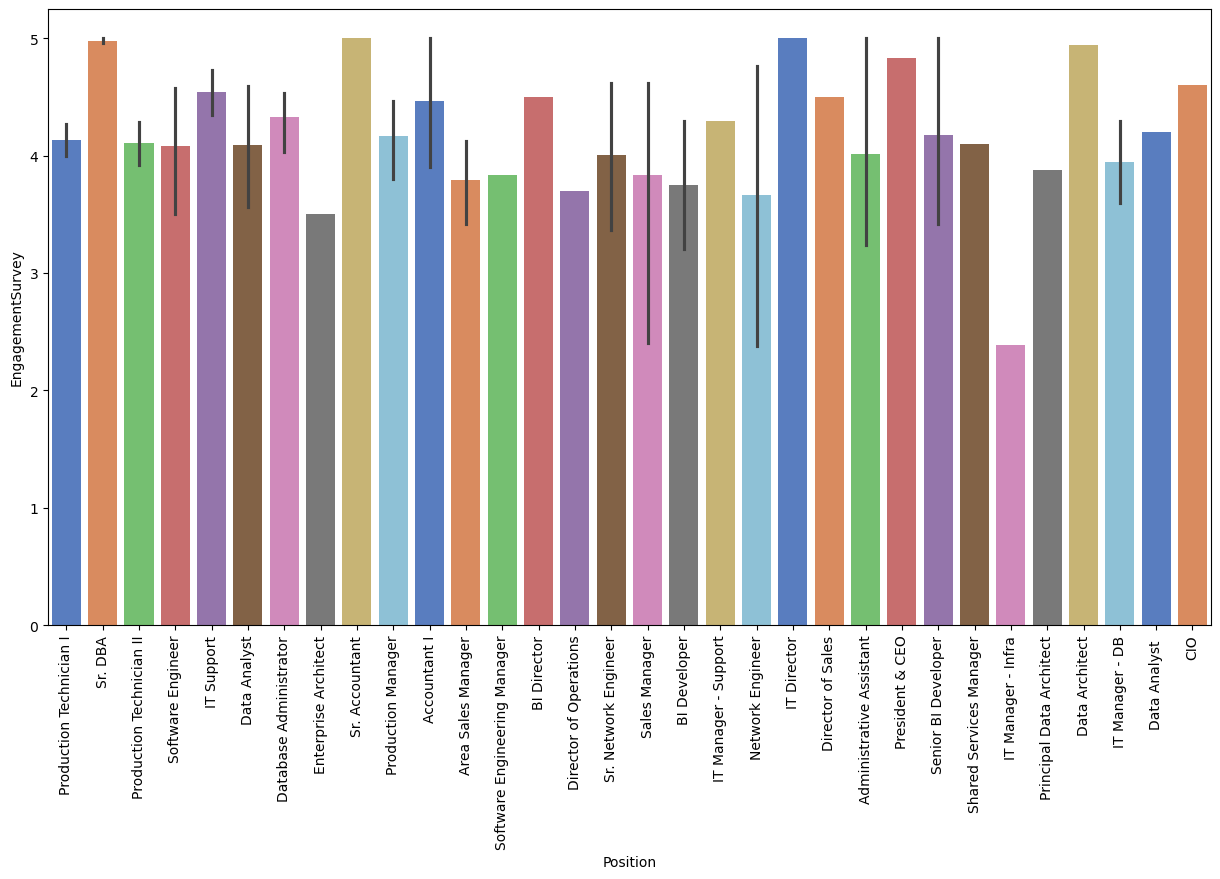

In [32]:
plt.figure(figsize = (15,8))
sns.barplot(x = "Position", y = "EngagementSurvey", data = df, palette = "muted")
plt.xticks(rotation = 90)
plt.show()

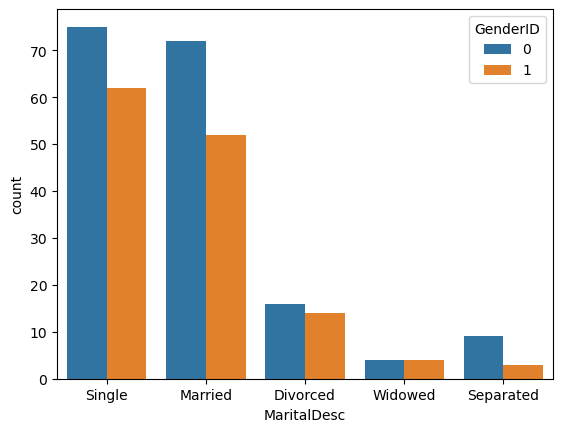

In [33]:
sns.countplot(x = "MaritalDesc", hue = "GenderID", data = df)
plt.show()

In [34]:
df.groupby('Department')['EngagementSurvey'].mean()

Department
Admin Offices           4.393333
Executive Office        4.830000
IT/IS                   4.154000
Production              4.129569
Sales                   3.818710
Software Engineering    4.061818
Name: EngagementSurvey, dtype: float64

In [37]:
df[df['Termd'] == 1].groupby('Position')['Employee_Name'].count()

Position
Administrative Assistant     2
Area Sales Manager           4
Data Analyst                 1
Data Analyst                 1
Database Administrator       3
Enterprise Architect         1
IT Manager - DB              1
Network Engineer             1
Principal Data Architect     1
Production Manager           5
Production Technician I     52
Production Technician II    26
Sales Manager                1
Software Engineer            4
Sr. DBA                      1
Name: Employee_Name, dtype: int64

In [38]:
df[df['Termd'] == 1].groupby('TermReason')['Employee_Name'].count()

TermReason
Another position                    20
Fatal attraction                     1
Learned that he is a gangster        1
attendance                           7
career change                        9
gross misconduct                     1
hours                                8
maternity leave - did not return     3
medical issues                       3
military                             4
more money                          11
no-call, no-show                     4
performance                          4
relocation out of area               5
retiring                             4
return to school                     5
unhappy                             14
Name: Employee_Name, dtype: int64

In [39]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [42]:
df.groupby('Sex')['Salary'].median()

Sex
F     62066.5
M     63353.0
Name: Salary, dtype: float64

In [43]:
df.groupby('Department').agg({'Absences': 'sum', 'EngagementSurvey': 'mean'})

,Absences,EngagementSurvey
Department,,
Admin Offices,78,4.393333
Executive Office,10,4.830000
IT/IS,522,4.154000
Production,2120,4.129569
Sales,358,3.818710
Software Engineering,96,4.061818
